# **Project 2**, APS1070 Winter 2023
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Mar 4, 11 PM - 13 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: 
*   Student Number: 

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a forest cover dataset: http://odds.cs.stonybrook.edu/forestcovercovertype-dataset/. This dataset contains 10 quantitative features that contain cartographic information.

Load the dataset in CSV file using Pandas. The dataset is called `vehicle_insurance.csv`. Print out the first few columns of the dataset.

* How many rows are there? 286048 **[0.1]**
* Which column contains the targets? The `anomaly` column. **[0.1]**
* What is the meaning of target values? The `anomaly` entry indicates an anomaly if the value is `1`; elsewise the value is `0`. **[0.2]**

In [1]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import wget

#wget.download('https://github.com/APS1070-W23/datasets/raw/main/forest_data_all.tar.gz','forest_data_all.tar.gz')

In [3]:
#!tar -zxvf forest_data_all.tar.gz

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('forest_data_all.csv')

In [5]:
### YOUR CODE HERE ###
df.tail(5)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Anomaly
286043,2617,29,13,390,128,2081,215,211,130,592,0
286044,2614,21,13,379,125,2051,211,212,135,618,0
286045,2612,17,13,371,123,2021,208,211,138,644,0
286046,2610,16,14,365,110,1991,208,211,138,671,0
286047,2608,23,14,361,108,1961,211,209,131,698,0


In [6]:
len_dataset = len(df)
print(len_dataset)

286048


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? 
> Anomalies: `0.96%`. Non anomalies: `99.04%`. **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case? 
> This dataset is very unbalanced since the two classes are present in vastly different amounts in the dataset. **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? 
> KNNs can become biased to the over-represented class since the probability of any given sample's `k` nearest neighbors having a greater porportion of the over-represented class increases. **[0.5]**
* What metrics should we use to evaluate a model in such cases 
> F1_score, ROC-AUC. **[0.2]**


In [7]:
### YOUR CODE HERE ###
not_anomaly = df[df.Anomaly == 0]
anomaly = df[df.Anomaly == 1]
num_not_anomaly = len(not_anomaly)
num_anomaly = len(anomaly)
percent_not_anomaly = round(100 * num_not_anomaly / (len_dataset), 2)
percent_anomaly = round(100 * num_anomaly / (len_dataset), 2)
print(f'Percent anomaly: {percent_anomaly}% \t| Percent not anomaly: {percent_not_anomaly}%')

Percent anomaly: 0.96% 	| Percent not anomaly: 99.04%


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [8]:
### Split the data  ###
from sklearn.model_selection import train_test_split

import math
train, test = train_test_split(df, test_size=math.floor(0.15 * len_dataset), random_state=40)
X_test, y_test = test.drop("Anomaly", axis=1, inplace=False), test.Anomaly
X_train, X_val, y_train, y_val = train_test_split(train.drop("Anomaly", axis=1, inplace=False), train.Anomaly, test_size=math.floor(0.20 * len_dataset), random_state=40)

Now, let's take a look at the difference in distribution for some variables between anomalous and non-anomalous forests:

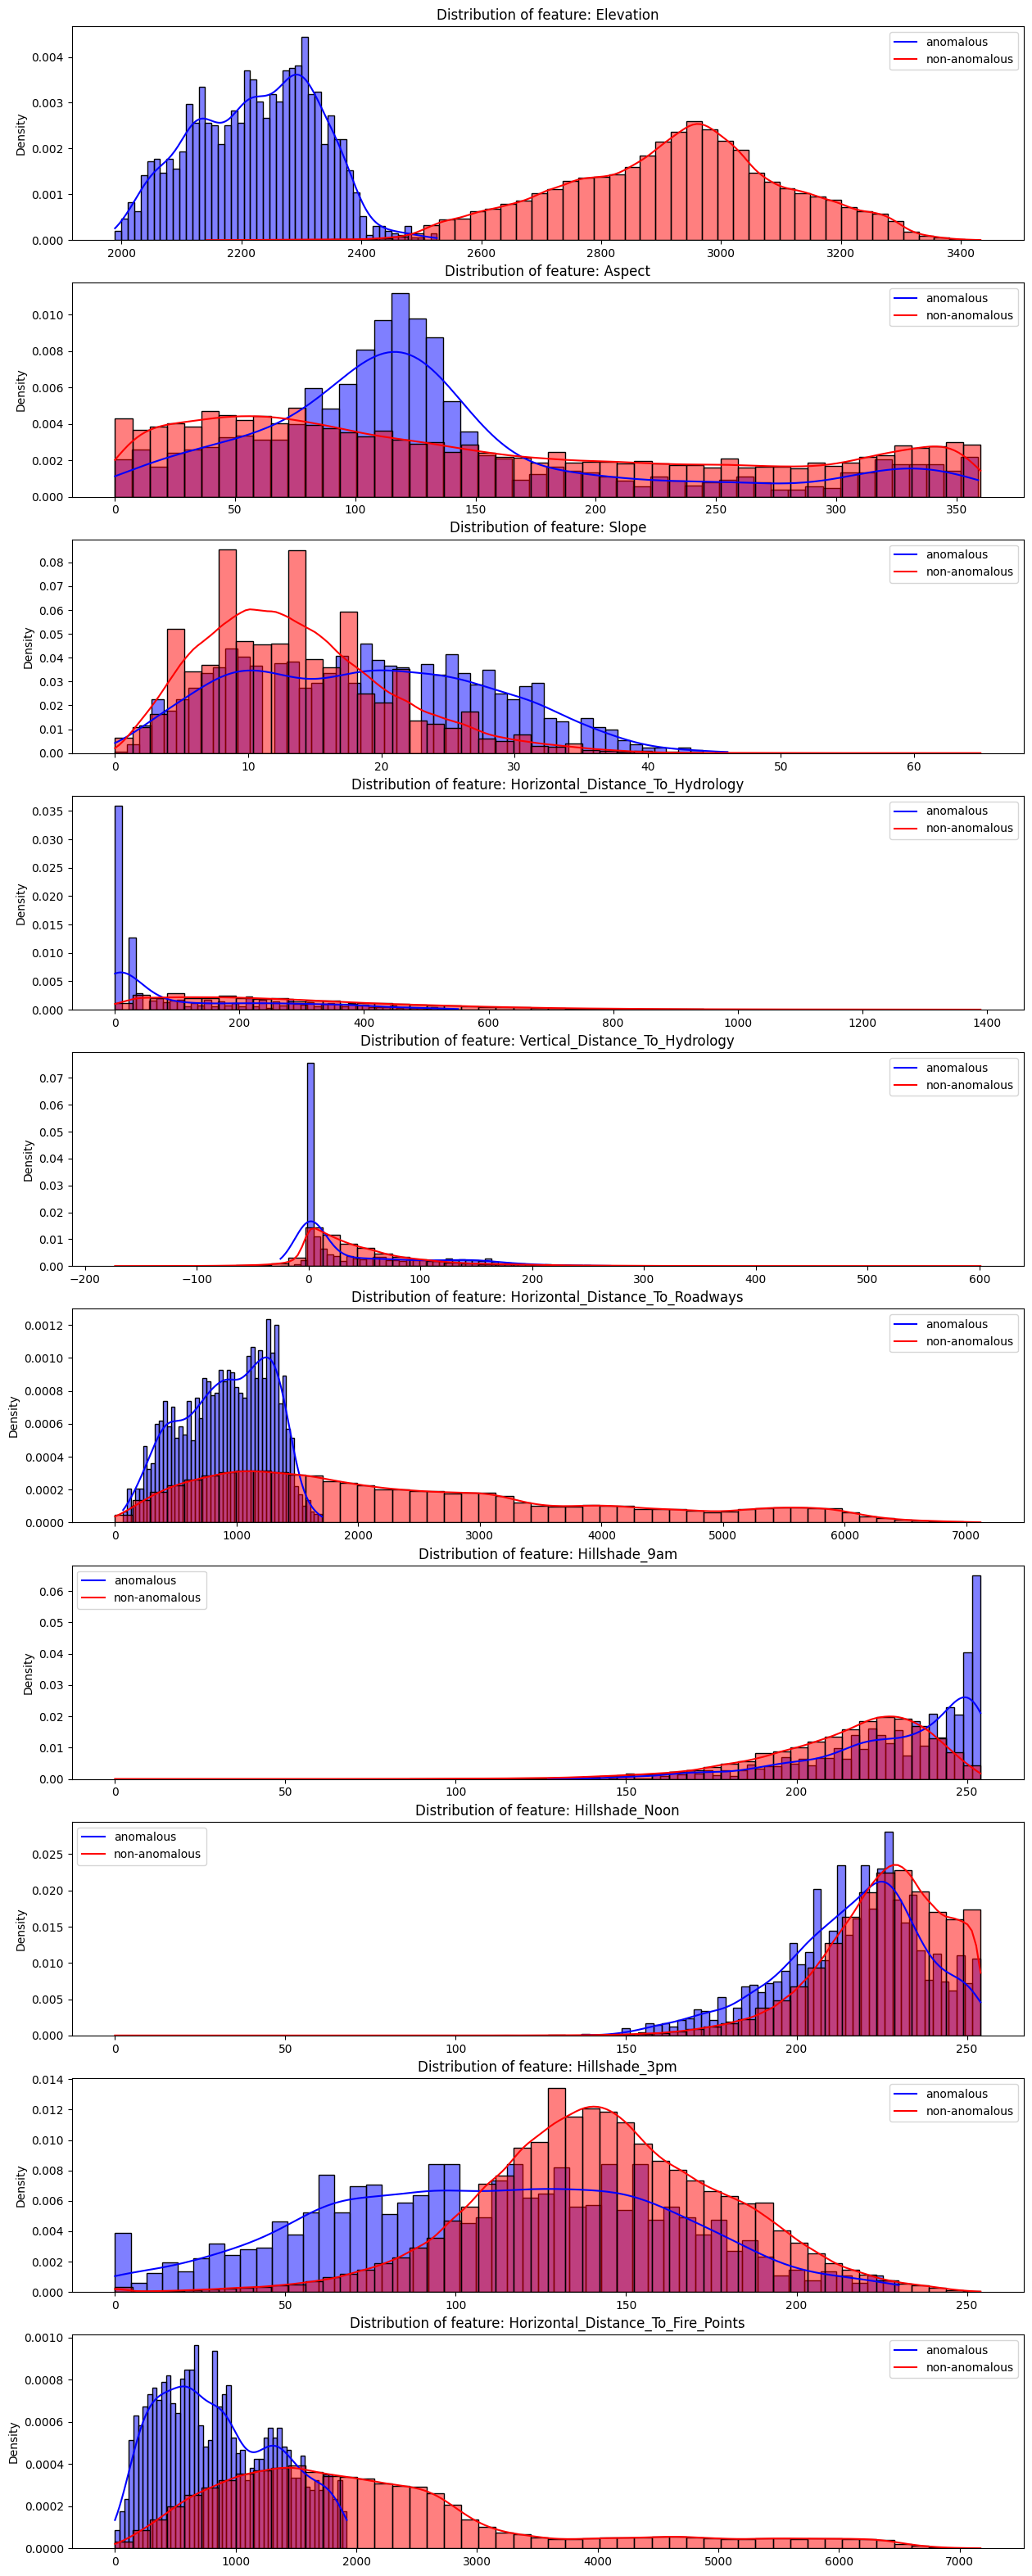

In [9]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'id' in f and not 'Anomaly' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['anomalous', 'non-anomalous'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

> Features that exhibit distributions that differ substantially in means and variance across the anomalous and non-anomalous subsets could provide as useful indicators of anomalous forests. We could make gaussian models over these features only, saving computational cost and ignoring features that do not differ substantially in their mean and variance across the two classes. In particular, `Elevation` seems to be the feature wise to fit a Gaussian model over as anomalous forests show a sibstantially different mean and variance over this feature than non-anomalous ones, with particularly little distributional overlap. 

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish anomalous forests from non-anomalous forests based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that forest as an anomaly. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-anomalous forests in the training set** in step 1 (instead of all the forests).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.3]**
 5. How would class imbalance affect any classifier in general (apart from just a KNN)? **[0.2]**


In [10]:
### YOUR CODE HERE ###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score


def single_model(n_components, X_train, X_val, y_train, y_val):
    gm = GaussianMixture(n_components=n_components)
    gm.fit(X_train)
    train_scores = gm.score_samples(X_train)
    val_scores = gm.score_samples(X_val)

    max_sample_val = math.ceil(max(val_scores)) + 1
    min_sample_val = math.floor(min(val_scores))

    optimal_threshold = None
    best_f1 = - math.inf
    for threshold in range(min_sample_val, max_sample_val):
        f1 = f1_score(y_val, val_scores <= threshold)
        if f1 > best_f1:
            optimal_threshold, best_f1 = threshold, f1
    
    fpr_train, tpr_train, _ = roc_curve(y_train, -1 * train_scores) 
    fpr_val, tpr_val, _ = roc_curve(y_val, -1 * val_scores) 

    AUC_train = auc(fpr_train, tpr_train)
    AUC_val = auc(fpr_val, tpr_val)


    prec_train = precision_score(y_train, train_scores <= optimal_threshold)
    prec_val = precision_score(y_val, val_scores <= optimal_threshold)
    recall_train = recall_score(y_train, train_scores <= optimal_threshold)
    recall_val = recall_score(y_val, val_scores <= optimal_threshold)
    
    return gm, train_scores, val_scores, optimal_threshold, best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val


In [11]:
data = {}

In [12]:
for feature in features:
    gm, _, _, optimal_threshold, best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val = single_model(
        n_components=1, 
        X_train = X_train[[feature]], 
        X_val = X_val[[feature]],
        y_train = y_train,
        y_val = y_val
        )
    data[f"{feature}"] = gm, [optimal_threshold, best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val]

In [13]:
rows = [key for key in data.keys()]
columns = ['optimal_threshold', 'optimal_f1_score', 'AUC_train', 'AUC_val', 'prec_train', 'prec_val', 'recall_train', 'recall_val']
table_data = [data[key][1] for key in data.keys()]
model_table = pd.DataFrame(data = table_data, columns=columns, index=rows)
print('Guassian Mixture Models')
model_table.sort_values(by=['AUC_val'], ascending=False)

Guassian Mixture Models


,optimal_threshold,optimal_f1_score,AUC_train,AUC_val,prec_train,prec_val,recall_train,recall_val
Elevation,-10,0.899145,0.999298,0.999408,0.825460,0.849758,0.932061,0.954628
Horizontal_Distance_To_Fire_Points,-8,0.019079,0.671045,0.670790,0.009579,0.009631,1.000000,1.000000
Horizontal_Distance_To_Hydrology,-7,0.049667,0.650944,0.660686,0.024531,0.026369,0.396968,0.426497
Hillshade_3pm,-8,0.088388,0.665883,0.646358,0.088590,0.084577,0.107243,0.092559
Vertical_Distance_To_Hydrology,-5,0.021572,0.649135,0.641361,0.011083,0.010917,0.916339,0.901996
Slope,-5,0.062242,0.648997,0.636228,0.044942,0.039225,0.172375,0.150635
Hillshade_9am,-5,0.043277,0.645191,0.619660,0.024910,0.023112,0.376755,0.339383
Horizontal_Distance_To_Roadways,-8,0.019079,0.613463,0.610248,0.009579,0.009631,1.000000,1.000000
Hillshade_Noon,-5,0.034489,0.537284,0.540230,0.019878,0.019231,0.176867,0.166969
Aspect,-5,0.019079,0.369579,0.384701,0.009579,0.009631,1.000000,1.000000


Features with highest AUC score over validation set: 
* `Elevation`
* `Horizontal_Distance_To_Fire_Points`
* `Horizontal_Distance_To_Hydrology`

The time complexity of finding the optimal threshold is $$O(\max_{x \in X_{val}}(\log l((\mu, \sigma^2); x)) - \min_{x \in X_{val}}(\log l(x; (\mu, \sigma^2))))$$ where 
$f$ is the Gaussian density with $ \mu = \mu(X_{val}), \sigma^2 = \sigma^2(X_{val}) $ and $l((\mu, \sigma^2); x) = p(x; (\mu, \sigma^2))$ is the likelihood function (which after the EM algorithm should return the aformentioned $\mu$ and $\sigma^2$ since it is fit to a single distribution.)

In [14]:
def single_model_train0(n_components, X_train, X_val, y_train, y_val):
    gm = GaussianMixture(n_components=n_components)
    
    train_non_anomalous = np.nonzero(y_train.values == 0)[0]
    X_train_0 = X_train.iloc[train_non_anomalous]
    gm.fit(X_train_0)

    
    train_scores = gm.score_samples(X_train)
    val_scores = gm.score_samples(X_val)

    max_sample_val = math.ceil(max(val_scores)) + 1
    min_sample_val = math.floor(min(val_scores))

    optimal_threshold = None
    best_f1 = - math.inf
    for threshold in range(min_sample_val, max_sample_val):
        f1 = f1_score(y_val, val_scores <= threshold)
        if f1 > best_f1:
            optimal_threshold, best_f1 = threshold, f1
    
    fpr_train, tpr_train, _ = roc_curve(y_train, -1 * train_scores) 
    fpr_val, tpr_val, _ = roc_curve(y_val, -1 * val_scores) 

    AUC_train = auc(fpr_train, tpr_train)
    AUC_val = auc(fpr_val, tpr_val)


    prec_train = precision_score(y_train, train_scores <= optimal_threshold)
    prec_val = precision_score(y_val, val_scores <= optimal_threshold)
    recall_train = recall_score(y_train, train_scores <= optimal_threshold)
    recall_val = recall_score(y_val, val_scores <= optimal_threshold)
    
    return gm, train_scores, val_scores, optimal_threshold, best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val


In [15]:
top_feature_data = {}
top_features = ['Elevation', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology']

In [16]:
for feature in top_features:
    gm, _, _, optimal_threshold, optimal_f1_score, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val = single_model_train0(
        n_components=1, 
        X_train = X_train[[feature]], 
        X_val = X_val[[feature]],
        y_train = y_train,
        y_val = y_val
        )
    top_feature_data[feature] = gm, [optimal_threshold, optimal_f1_score, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val]

In [17]:
columns = ['optimal_threshold', 'optimal_f1_score', 'AUC_train', 'AUC_val', 'prec_train', 'prec_val', 'recall_train', 'recall_val']
top_feature_table_data = [top_feature_data[key][1] for key in top_features]
top_feature_data_model_table = pd.DataFrame(data=top_feature_table_data, columns=columns, index=top_features)
print(f"Gaussian over top AUC-features trained on non-anomalous training data.")
top_feature_data_model_table.sort_values(by=['AUC_val'], ascending=False)

Gaussian over top AUC-features trained on non-anomalous training data.


,optimal_threshold,optimal_f1_score,AUC_train,AUC_val,prec_train,prec_val,recall_train,recall_val
Elevation,-10,0.891825,0.999312,0.999416,0.790381,0.818182,0.978102,0.980036
Horizontal_Distance_To_Fire_Points,-8,0.019079,0.673306,0.672976,0.009579,0.009631,1.000000,1.000000
Horizontal_Distance_To_Hydrology,-7,0.050048,0.651506,0.661528,0.024731,0.026584,0.396968,0.426497


In [18]:
model_table.loc[top_features]

,optimal_threshold,optimal_f1_score,AUC_train,AUC_val,prec_train,prec_val,recall_train,recall_val
Elevation,-10,0.899145,0.999298,0.999408,0.825460,0.849758,0.932061,0.954628
Horizontal_Distance_To_Fire_Points,-8,0.019079,0.671045,0.670790,0.009579,0.009631,1.000000,1.000000
Horizontal_Distance_To_Hydrology,-7,0.049667,0.650944,0.660686,0.024531,0.026369,0.396968,0.426497


> There is negligeable difference between training on all vs non-anomalous data across the top `AUC` features. This is most likely because non-anomalous features made up over 99% of the dataset, and thus the distributiont the gaussian model learns is almost solely affected by this class. 

> Class inbalance causes overfitting to the over-represented classes and underfitting to the under-represented ones. 

## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-anomalous blue and anomalous red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on non-anomalous forests). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




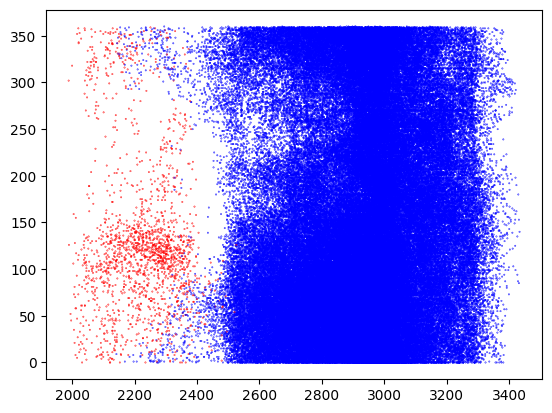

In [19]:
colors = y_train.copy()
colors[colors == 0] = 'b'
colors[colors == 1] = 'r'
plt.scatter(X_train.Elevation, X_train.Aspect, c=colors, s=0.1)

1 Gaussian needed

In [20]:
pair_data = {}
feature_pairs = [
    ['Elevation', 'Aspect'], 
    ['Slope', 'Horizontal_Distance_To_Hydrology'], 
    ['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways'],
    ['Hillshade_9am', 'Hillshade_Noon']
    ]

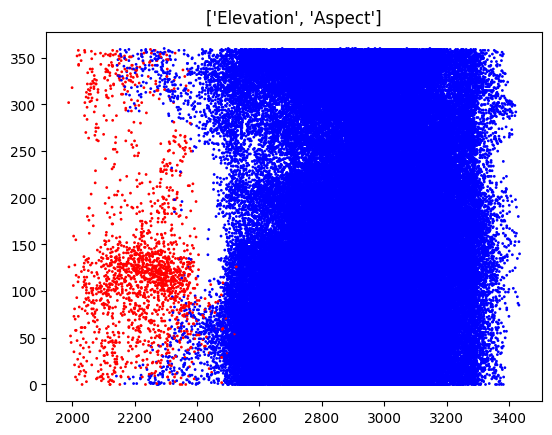

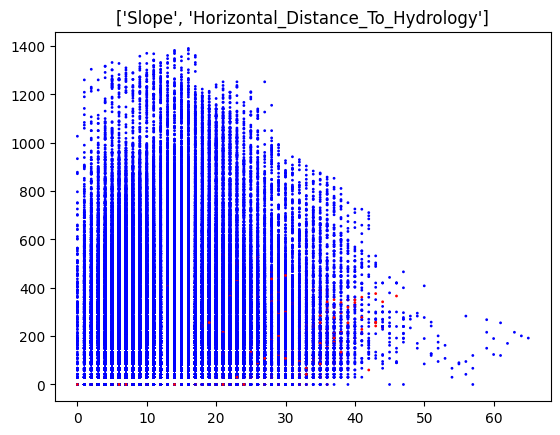

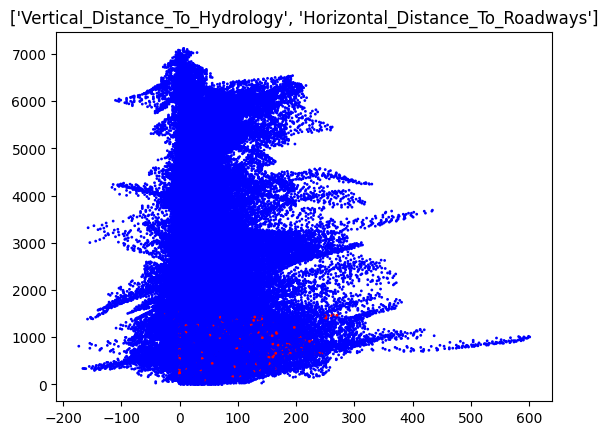

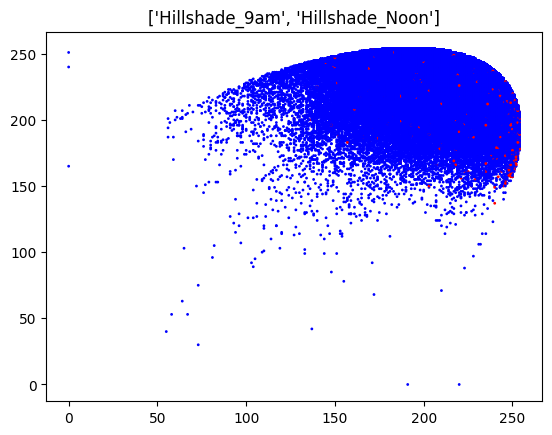

In [21]:
for feature_pair in feature_pairs:

    plt.title(str(feature_pair))
    plt.scatter(X_train[feature_pair[0]], X_train[feature_pair[1]], c=colors, s=1)
    plt.show()
    plt.close()

Number of components will be $1, 3, 1, 1$ for the respective pairs. 

In [22]:
num_components = [1,3,1,1]

In [23]:
for i, feature_pair in enumerate(feature_pairs):
    gm, train_scores, val_scores, optimal_threshold, best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val = single_model_train0(
        n_components=num_components[i], 
        X_train = X_train[feature_pair], 
        X_val = X_val[feature_pair],
        y_train = y_train,
        y_val = y_val
        )
    pair_data[str(feature_pair)] = gm, train_scores, val_scores, [optimal_threshold,  best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val]

In [24]:
pair_rows = [key for key in pair_data.keys()]
pair_columns = ['optimal_threshold', 'optimal_f1_score', 'AUC_train', 'AUC_val', 'prec_train', 'prec_val', 'recall_train', 'recall_val']
pair_table_data = [pair_data[key][3] for key in pair_data.keys()]
pair_model_table = pd.DataFrame(data = pair_table_data, columns=pair_columns, index=pair_rows)
print('Guassian Mixture Models over Feature Pairs')
pair_model_table.sort_values(by=['AUC_val'], ascending=False)

Guassian Mixture Models over Feature Pairs


,optimal_threshold,optimal_f1_score,AUC_train,AUC_val,prec_train,prec_val,recall_train,recall_val
"['Elevation', 'Aspect']",-17,0.841918,0.998356,0.998725,0.779310,0.824348,0.824818,0.860254
"['Slope', 'Horizontal_Distance_To_Hydrology']",-10,0.039511,0.733618,0.727971,0.020260,0.020277,0.773161,0.767695
"['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']",-14,0.023549,0.617814,0.608180,0.012615,0.012051,0.541830,0.513612
"['Hillshade_9am', 'Hillshade_Noon']",-10,0.033773,0.615181,0.604952,0.018046,0.018447,0.202695,0.199637


Feature pair with highest AUC: `['Elevation', 'Aspect']`

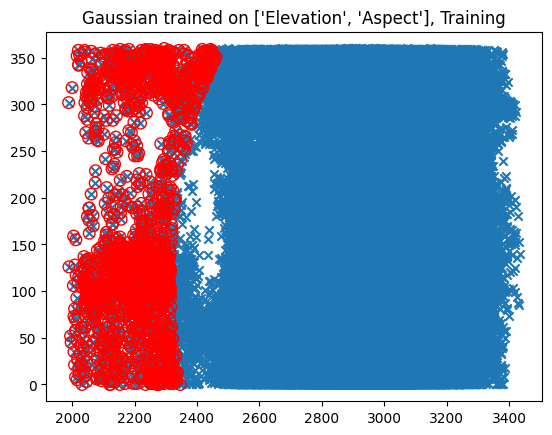

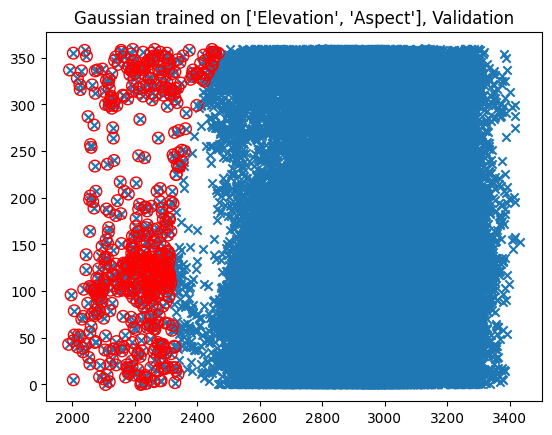

In [25]:
scores = pair_data[str(['Elevation', 'Aspect'])]
train_scores, val_scores = scores[1], scores[2]

markers_train = y_train.copy()
markers_val = y_val.copy()

outliers_train = np.nonzero(train_scores <= -17)[0]
outliers_val = np.nonzero(val_scores <= -17)[0]

X_train_outliers = X_train.iloc[outliers_train]
X_val_outliers = X_val.iloc[outliers_val]

plt.title('Gaussian trained on ' + str(['Elevation', 'Aspect']) + ', Training')
plt.scatter(X_train.Elevation, X_train.Aspect, marker='x')
plt.scatter(X_train_outliers.Elevation, X_train_outliers.Aspect, marker='o', facecolor="none", edgecolor="r",s=70)
plt.show()
plt.close()

plt.title('Gaussian trained on ' + str(['Elevation', 'Aspect']) + ', Validation')
plt.scatter(X_val.Elevation, X_val.Aspect, marker='x')
plt.scatter(X_val_outliers.Elevation, X_val_outliers.Aspect, marker='o', facecolor="none", edgecolor="r",s=70)
plt.show()
plt.close()

## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for anomalous and non-anomalous forests.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **anomalous forests** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the forest is classified as anomalous. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the forest is anomalous (the forest belongs to the $G_2$ distribution which represents anomalous forests). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

In [26]:
def double_model(n_components_0, n_components_1, X_train, X_val, y_train, y_val):
    
    train_anomalous = np.nonzero(y_train.values != 0)[0]
    train_normal = np.nonzero(y_train.values == 0)[0]

    X_train_0 = X_train.iloc[train_normal]
    X_train_1 = X_train.iloc[train_anomalous]

    gm_0 = GaussianMixture(n_components=n_components_0)
    gm_0.fit(X_train_0)

    gm_1 = GaussianMixture(n_components=n_components_1)
    gm_1.fit(X_train_1)
    
    train_scores_0 = gm_0.score_samples(X_train)
    val_scores_0 = gm_0.score_samples(X_val)

    train_scores_1 = gm_1.score_samples(X_train)
    val_scores_1 = gm_1.score_samples(X_val)


    optimal_c = None
    best_f1 = - math.inf
    for c in np.arange(0, 10, 0.1):
        f1 = f1_score(y_val, val_scores_0 <= c * val_scores_1)
        if f1 > best_f1:
            optimal_c, best_f1 = c, f1

    prec_train = precision_score(y_train, train_scores_0 <= optimal_c * train_scores_1)
    prec_val = precision_score(y_val, val_scores_0 <= optimal_c * val_scores_1)


    recall_train = recall_score(y_train, train_scores_0 <= optimal_c * train_scores_1)
    recall_val = recall_score(y_val, val_scores_0 <= optimal_c * val_scores_1)
    
    return gm_0, gm_1, train_scores_0, train_scores_1, val_scores_0, val_scores_1, optimal_c, best_f1, prec_train, prec_val, recall_train, recall_val

    

In [27]:
double_gaussian_data = {}

In [28]:
for feature in features:
    gm_0, gm_1, _, _, _, _, optimal_c, optimal_f1_score, prec_train, prec_val, recall_train, recall_val = double_model(
        n_components_0=1, 
        n_components_1=1,
        X_train = X_train[[feature]], 
        X_val = X_val[[feature]],
        y_train = y_train,
        y_val = y_val
        )
    double_gaussian_data[feature] = (gm_0, gm_1), [optimal_c, optimal_f1_score, prec_train, prec_val, recall_train, recall_val]

In [29]:
columns = [ 'optimal_c', 'optimal_f1_score', 'prec_train', 'prec_val', 'recall_train', 'recall_val']
double_gaussian_table_data = [double_gaussian_data[key][1] for key in double_gaussian_data.keys()]
double_gaussian_model_table = pd.DataFrame(data = double_gaussian_table_data, columns=columns, index=features)


In [30]:
double_gaussian_model_table.sort_values(by=['optimal_f1_score'], ascending=False)

,optimal_c,optimal_f1_score,prec_train,prec_val,recall_train,recall_val
Elevation,1.6,0.900085,0.822573,0.850000,0.937114,0.956443
Hillshade_3pm,1.3,0.113374,0.087912,0.081359,0.206625,0.186933
Slope,1.3,0.066649,0.040156,0.039117,0.230769,0.225045
Hillshade_9am,1.1,0.052149,0.030605,0.027742,0.482875,0.433757
Horizontal_Distance_To_Roadways,1.2,0.051697,0.026154,0.027018,0.588995,0.597096
Horizontal_Distance_To_Fire_Points,1.2,0.051049,0.025784,0.027487,0.338012,0.357532
Horizontal_Distance_To_Hydrology,1.1,0.044128,0.021897,0.022772,0.682201,0.709619
Vertical_Distance_To_Hydrology,1.0,0.038175,0.018887,0.019673,0.619876,0.640653
Hillshade_Noon,1.1,0.036456,0.020119,0.019863,0.230208,0.221416
Aspect,1.0,0.022688,0.011774,0.011506,0.823695,0.803993


In [31]:
double_gaussian_model_table.sort_values(by=['prec_val'], ascending=False)

,optimal_c,optimal_f1_score,prec_train,prec_val,recall_train,recall_val
Elevation,1.6,0.900085,0.822573,0.850000,0.937114,0.956443
Hillshade_3pm,1.3,0.113374,0.087912,0.081359,0.206625,0.186933
Slope,1.3,0.066649,0.040156,0.039117,0.230769,0.225045
Hillshade_9am,1.1,0.052149,0.030605,0.027742,0.482875,0.433757
Horizontal_Distance_To_Fire_Points,1.2,0.051049,0.025784,0.027487,0.338012,0.357532
Horizontal_Distance_To_Roadways,1.2,0.051697,0.026154,0.027018,0.588995,0.597096
Horizontal_Distance_To_Hydrology,1.1,0.044128,0.021897,0.022772,0.682201,0.709619
Hillshade_Noon,1.1,0.036456,0.020119,0.019863,0.230208,0.221416
Vertical_Distance_To_Hydrology,1.0,0.038175,0.018887,0.019673,0.619876,0.640653
Aspect,1.0,0.022688,0.011774,0.011506,0.823695,0.803993


In [32]:
double_gaussian_model_table.sort_values(by=['recall_val'], ascending=False)

,optimal_c,optimal_f1_score,prec_train,prec_val,recall_train,recall_val
Elevation,1.6,0.900085,0.822573,0.850000,0.937114,0.956443
Aspect,1.0,0.022688,0.011774,0.011506,0.823695,0.803993
Horizontal_Distance_To_Hydrology,1.1,0.044128,0.021897,0.022772,0.682201,0.709619
Vertical_Distance_To_Hydrology,1.0,0.038175,0.018887,0.019673,0.619876,0.640653
Horizontal_Distance_To_Roadways,1.2,0.051697,0.026154,0.027018,0.588995,0.597096
Hillshade_9am,1.1,0.052149,0.030605,0.027742,0.482875,0.433757
Horizontal_Distance_To_Fire_Points,1.2,0.051049,0.025784,0.027487,0.338012,0.357532
Slope,1.3,0.066649,0.040156,0.039117,0.230769,0.225045
Hillshade_Noon,1.1,0.036456,0.020119,0.019863,0.230208,0.221416
Hillshade_3pm,1.3,0.113374,0.087912,0.081359,0.206625,0.186933


The AUC cannot be calculated unless we find the TPR and FPR for different thresholds, which we did not do, since we used the $S_1 < c * S_2$ method of determining the class, and not threshold.  

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-anomalous forests or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid forests and multiple components for anomalous ones! Why does it make sense to have multiple components for the anomalous forests?

In [33]:
data = {}

In [34]:
for i in range(1, 4):
    gm, _, _, optimal_threshold, optimal_f1_score, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val = single_model(
        n_components=i, 
        X_train = X_train, 
        X_val = X_val,
        y_train = y_train,
        y_val = y_val
        )
    data[f"All_features_{i}_component(s)"] = gm, [optimal_threshold, None, optimal_f1_score, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val]

In [35]:
for feature in features:
    gm, _, _, optimal_threshold, optimal_f1_score, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val = single_model(
        n_components=1, 
        X_train = X_train[[feature]], 
        X_val = X_val[[feature]],
        y_train = y_train,
        y_val = y_val
        )
    data[f"Feature_{feature}_1_component"] = gm, [optimal_threshold, None, optimal_f1_score, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val]

In [36]:
for i in range(1, 4):
    gm_0, gm_1, _, _, _, _, optimal_c, optimal_f1_score, prec_train, prec_val, recall_train, recall_val = double_model(
        n_components_0=1, 
        n_components_1=i,
        X_train = X_train, 
        X_val = X_val,
        y_train = y_train,
        y_val = y_val
        )
    data[f"All_features_1_nonanomalous_component_{i}_anomolous_component(s)"] = (gm_0, gm_1), [None, optimal_c, optimal_f1_score, None, None, prec_train, prec_val, recall_train, recall_val]

In [37]:
rows = [key for key in data.keys()]
columns = ['optimal_threshold', 'optimal_c', 'optimal_f1_score', 'AUC_train', 'AUC_val', 'prec_train', 'prec_val', 'recall_train', 'recall_val']
table_data = [data[key][1] for key in data.keys()]
model_table = pd.DataFrame(data = table_data, columns=columns, index=rows)

In [38]:
print('Guassian Mixture Models')
model_table

Guassian Mixture Models


,optimal_threshold,optimal_c,optimal_f1_score,AUC_train,AUC_val,prec_train,prec_val,recall_train,recall_val
All_features_1_component(s),-61.0,NaN,0.170079,0.934087,0.932875,0.097418,0.097072,0.688377,0.686025
All_features_2_component(s),-61.0,NaN,0.177307,0.921054,0.922050,0.111687,0.106391,0.568782,0.531760
All_features_3_component(s),-61.0,NaN,0.174349,0.917199,0.916838,0.111840,0.105383,0.526670,0.504537
Feature_Elevation_1_component,-10.0,NaN,0.899145,0.999298,0.999408,0.825460,0.849758,0.932061,0.954628
Feature_Aspect_1_component,-5.0,NaN,0.019079,0.369579,0.384701,0.009579,0.009631,1.000000,1.000000
Feature_Slope_1_component,-5.0,NaN,0.062242,0.648997,0.636228,0.044942,0.039225,0.172375,0.150635
Feature_Horizontal_Distance_To_Hydrology_1_component,-7.0,NaN,0.049667,0.650944,0.660686,0.024531,0.026369,0.396968,0.426497
Feature_Vertical_Distance_To_Hydrology_1_component,-5.0,NaN,0.021572,0.649135,0.641361,0.011083,0.010917,0.916339,0.901996
Feature_Horizontal_Distance_To_Roadways_1_component,-8.0,NaN,0.019079,0.613463,0.610248,0.009579,0.009631,1.000000,1.000000
Feature_Hillshade_9am_1_component,-5.0,NaN,0.043277,0.645191,0.619660,0.024910,0.023112,0.376755,0.339383


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [39]:
gm_0, gm_1 = data['All_features_1_nonanomalous_component_1_anomolous_component(s)'][0]
optimal_c = model_table.loc['All_features_1_nonanomalous_component_1_anomolous_component(s)', 'optimal_c']


test_scores_0 = gm_0.score_samples(X_test)
test_scores_1 = gm_1.score_samples(X_test)

f1_test = f1_score(y_test, test_scores_0 <= optimal_c * test_scores_1)
prec_test = precision_score(y_test, test_scores_0 <= optimal_c * test_scores_1)
recall_test = recall_score(y_test, test_scores_0 <= optimal_c * test_scores_1)

print(f"Test Scores\nF1-score: {f1_test} | Precision: {prec_test} | Recall: {recall_test}")

Test Scores
F1-score: 0.9138755980861245 | Precision: 0.9073634204275535 | Recall: 0.9204819277108434


## **Bonus Part: Using the Precision Recall Curve: [1 Mark]**
Repeat Part 2 using the Precision Recall Curve instead of the ROC curve.

In [40]:
from sklearn.metrics import precision_recall_curve
def single_model_PR_curve(n_components, X_train, X_val, y_train, y_val):
    gm = GaussianMixture(n_components=n_components)
    gm.fit(X_train)
    train_scores = gm.score_samples(X_train)
    val_scores = gm.score_samples(X_val)

    max_sample_val = math.ceil(max(val_scores)) + 1
    min_sample_val = math.floor(min(val_scores))

    optimal_threshold = None
    best_f1 = - math.inf
    for threshold in range(min_sample_val, max_sample_val):
        f1 = f1_score(y_val, val_scores <= threshold)
        if f1 > best_f1:
            optimal_threshold, best_f1 = threshold, f1
    
    prec_train, rec_train, _ = precision_recall_curve(y_train, -1 * train_scores) 
    prec_val, rec_val, _ = precision_recall_curve(y_val, -1 * val_scores) 

    AUC_train = auc(rec_train, prec_train)
    AUC_val = auc(rec_val, prec_val)


    prec_train = precision_score(y_train, train_scores <= optimal_threshold)
    prec_val = precision_score(y_val, val_scores <= optimal_threshold)
    recall_train = recall_score(y_train, train_scores <= optimal_threshold)
    recall_val = recall_score(y_val, val_scores <= optimal_threshold)
    
    return gm, train_scores, val_scores, optimal_threshold, best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val



In [41]:
PR_data = {}

In [42]:
for i, feature in enumerate(features):
    gm, _, _, optimal_threshold, optimal_f1_score, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val = single_model_PR_curve(
        n_components=1, 
        X_train = X_train[[feature]], 
        X_val = X_val[[feature]],
        y_train = y_train,
        y_val = y_val
        )
    PR_data[f"{feature}"] = gm, [optimal_threshold,  optimal_f1_score, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val]

In [43]:
PR_rows = [key for key in PR_data.keys()]
PR_columns = ['optimal_threshold', 'optimal_f1_score', 'AUC_train', 'AUC_val', 'prec_train', 'prec_val', 'recall_train', 'recall_val']
PR_table_data = [PR_data[key][1] for key in PR_data.keys()]
PR_model_table = pd.DataFrame(data = PR_table_data, columns=PR_columns, index=PR_rows)
print("Gaussian trained on all training data. AUC of Validation Precision-Recall Curve.")
PR_model_table.sort_values(by=['AUC_val'], ascending=False)

Gaussian trained on all training data. AUC of Validation Precision-Recall Curve.


,optimal_threshold,optimal_f1_score,AUC_train,AUC_val,prec_train,prec_val,recall_train,recall_val
Elevation,-10,0.899145,0.924137,0.931773,0.825460,0.849758,0.932061,0.954628
Hillshade_3pm,-8,0.088388,0.042077,0.034558,0.088590,0.084577,0.107243,0.092559
Slope,-5,0.062242,0.023974,0.020992,0.044942,0.039225,0.172375,0.150635
Horizontal_Distance_To_Hydrology,-7,0.049667,0.015299,0.016051,0.024531,0.026369,0.396968,0.426497
Hillshade_9am,-5,0.043277,0.016147,0.015189,0.024910,0.023112,0.376755,0.339383
Horizontal_Distance_To_Fire_Points,-8,0.019079,0.013916,0.013859,0.009579,0.009631,1.000000,1.000000
Vertical_Distance_To_Hydrology,-5,0.021572,0.013495,0.012994,0.011083,0.010917,0.916339,0.901996
Hillshade_Noon,-5,0.034489,0.013461,0.012745,0.019878,0.019231,0.176867,0.166969
Horizontal_Distance_To_Roadways,-8,0.019079,0.011053,0.011012,0.009579,0.009631,1.000000,1.000000
Aspect,-5,0.019079,0.007092,0.007420,0.009579,0.009631,1.000000,1.000000


Top 3 Features by AUC:
* `Elevation`,
* `Hillshade_3pm`,
* `Slope`

In [44]:
from sklearn.metrics import precision_recall_curve
def single_model_train0_PRCURVE(n_components, X_train, X_val, y_train, y_val):
    gm = GaussianMixture(n_components=n_components)

    train_non_anomalous = np.nonzero(y_train.values == 0)[0]
    X_train_0 = X_train.iloc[train_non_anomalous]
    gm.fit(X_train_0)

    train_scores = gm.score_samples(X_train)
    val_scores = gm.score_samples(X_val)

    max_sample_val = math.ceil(max(val_scores)) + 1
    min_sample_val = math.floor(min(val_scores))

    optimal_threshold = None
    best_f1 = - math.inf
    for threshold in range(min_sample_val, max_sample_val):
        f1 = f1_score(y_val, val_scores <= threshold)
        if f1 > best_f1:
            optimal_threshold, best_f1 = threshold, f1
    
    prec_train, rec_train, _ = precision_recall_curve(y_train, -1 * train_scores) 
    prec_val, rec_val, _ = precision_recall_curve(y_val, -1 * val_scores) 

    AUC_train = auc(rec_train, prec_train)
    AUC_val = auc(rec_val, prec_val)


    prec_train = precision_score(y_train, train_scores <= optimal_threshold)
    prec_val = precision_score(y_val, val_scores <= optimal_threshold)
    recall_train = recall_score(y_train, train_scores <= optimal_threshold)
    recall_val = recall_score(y_val, val_scores <= optimal_threshold)
    
    return gm, train_scores, val_scores, optimal_threshold, best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val


In [45]:
top_features = ['Elevation', 'Hillshade_3pm', 'Slope']
PR_0_data = {}

In [46]:
for feature in top_features:   
    gm, _, _, optimal_threshold, best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val = single_model_train0_PRCURVE(
        n_components=1, 
        X_train = X_train[[feature]], 
        X_val = X_val[[feature]],
        y_train = y_train,
        y_val = y_val
        )
    PR_0_data[feature] = gm, [optimal_threshold,  best_f1, AUC_train, AUC_val, prec_train, prec_val, recall_train, recall_val]

In [47]:
PR_0_table_data = [PR_0_data[feature][1] for feature in top_features]
PR_0_model_table = pd.DataFrame(data = PR_0_table_data, columns=PR_columns, index=top_features)
print(f"Gaussian over {top_features} trained on non-anomalous training data. AUC of Validation Precision-Recall Curve.")
PR_0_model_table.sort_values(by=['AUC_val'], ascending=False)

Gaussian over ['Elevation', 'Hillshade_3pm', 'Slope'] trained on non-anomalous training data. AUC of Validation Precision-Recall Curve.


,optimal_threshold,optimal_f1_score,AUC_train,AUC_val,prec_train,prec_val,recall_train,recall_val
Elevation,-10,0.891825,0.924481,0.932068,0.790381,0.818182,0.978102,0.980036
Hillshade_3pm,-8,0.090680,0.042077,0.034558,0.086259,0.084375,0.111735,0.098004
Slope,-5,0.062242,0.023974,0.020992,0.044942,0.039225,0.172375,0.150635


In [48]:
PR_model_table.loc[top_features]

,optimal_threshold,optimal_f1_score,AUC_train,AUC_val,prec_train,prec_val,recall_train,recall_val
Elevation,-10,0.899145,0.924137,0.931773,0.825460,0.849758,0.932061,0.954628
Hillshade_3pm,-8,0.088388,0.042077,0.034558,0.088590,0.084577,0.107243,0.092559
Slope,-5,0.062242,0.023974,0.020992,0.044942,0.039225,0.172375,0.150635


> Again, there is negligeable difference between fitting the Gaussian to the top features if anomalous training data is excluded or included. 

In [58]:
%%cmd
jupyter nbconvert --to html "C:\Users\nurei\Documents\MIE\APS1070\project\2\W23_APS1070_Project_2".ipynb --HTMLExporter.theme=dark

Microsoft Windows [Version 10.0.22621.1265]
(c) Microsoft Corporation. All rights reserved.

(venv) c:\Users\nurei\Documents\MIE\APS1070\project\2>jupyter nbconvert --to html "C:\Users\nurei\Documents\MIE\APS1070\project\2\W23_APS1070_Project_2".ipynb --HTMLExporter.theme=dark


[NbConvertApp] Converting notebook C:\Users\nurei\Documents\MIE\APS1070\project\2\W23_APS1070_Project_2.ipynb to html
[NbConvertApp] Writing 2269266 bytes to C:\Users\nurei\Documents\MIE\APS1070\project\2\W23_APS1070_Project_2.html



(venv) c:\Users\nurei\Documents\MIE\APS1070\project\2>